<a href="https://colab.research.google.com/github/asepmuhidin/DM-C3/blob/main/ws_visdata_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/mnt')

Mounted at /mnt


In [4]:
!ls /mnt/MyDrive/DMUPB/dataset/

Global_Superstore2.xlsx


In [5]:
path='/mnt/MyDrive/DMUPB/dataset/Global_Superstore2.xlsx'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset=pd.read_excel(path)
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [10]:
dataset.Country.value_counts()

,count
Country,
United States,9994
Australia,2837
France,2827
Mexico,2644
Germany,2065
...,...
South Sudan,2
Bahrain,2
Swaziland,2


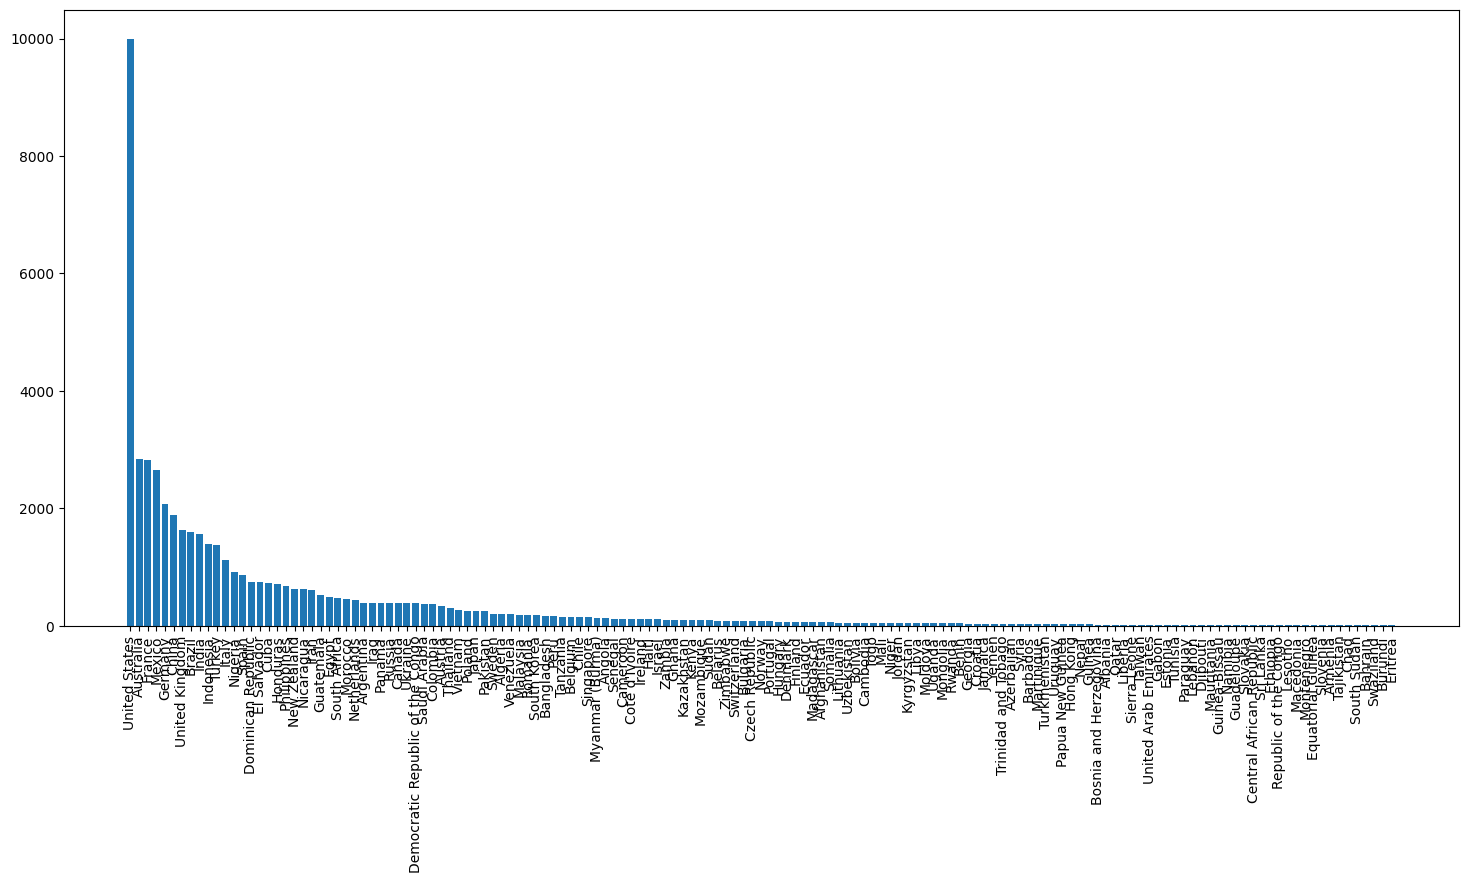

In [15]:
x=dataset.Country.value_counts().index
y=dataset.Country.value_counts().values
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

In [21]:
sales_of_country=dataset.groupby('Country')['Sales'].sum()
sales_of_country.sort_values(ascending=False, inplace=True)

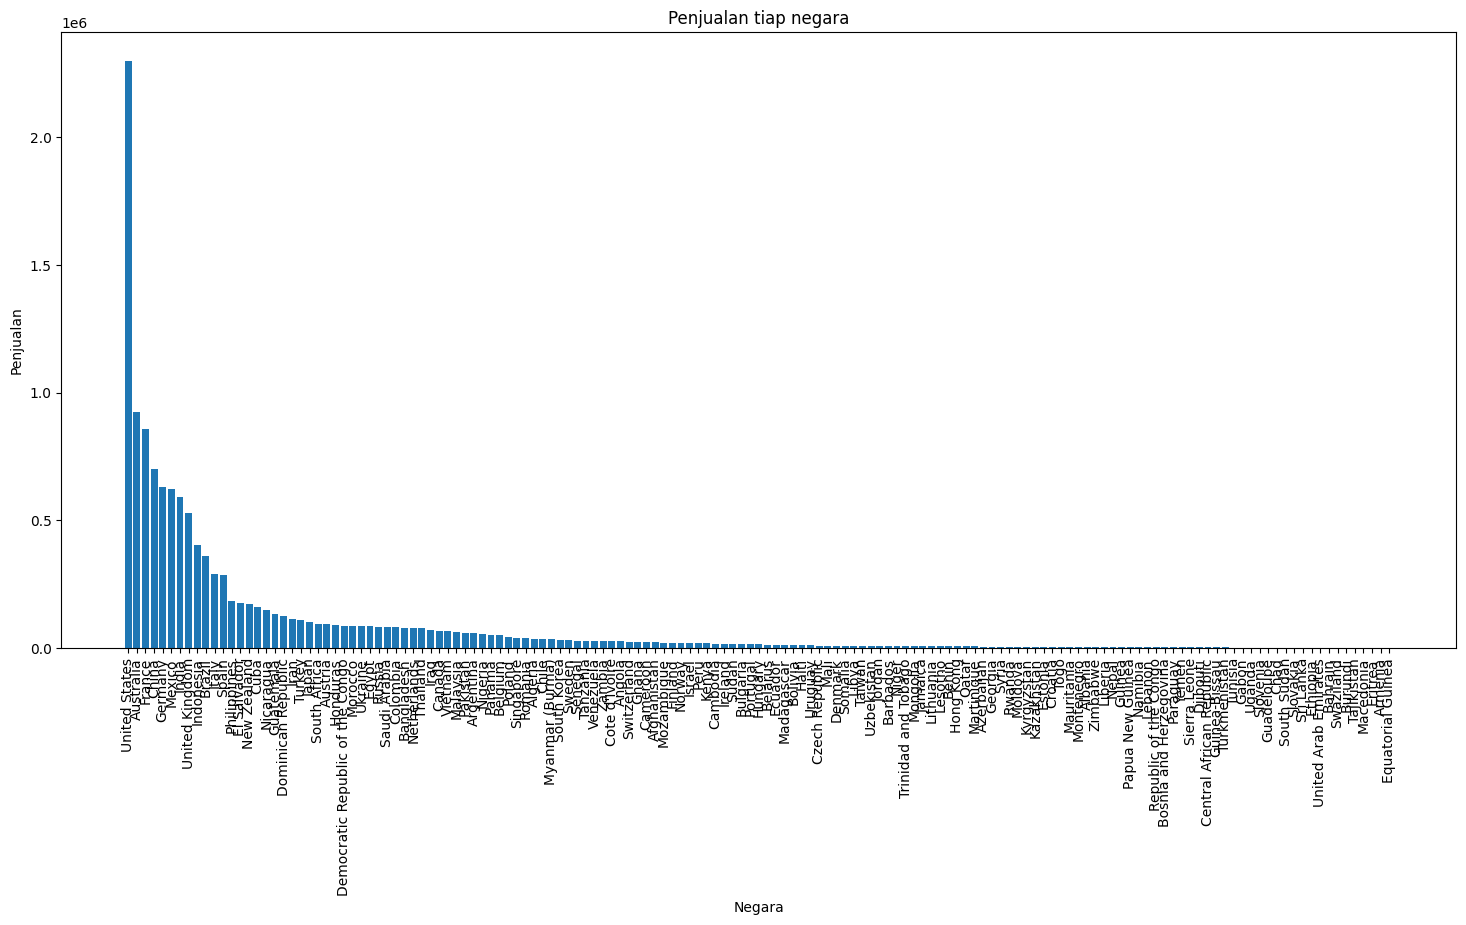

In [23]:
x=sales_of_country.index
y=sales_of_country.values
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.title('Penjualan tiap negara')
plt.xlabel('Negara')
plt.ylabel('Penjualan')
plt.bar(x,y)
plt.show()

In [41]:
sales_up20k=sales_of_country[sales_of_country>=20000]
sales_up20k.sort_values(ascending=True, inplace=True)

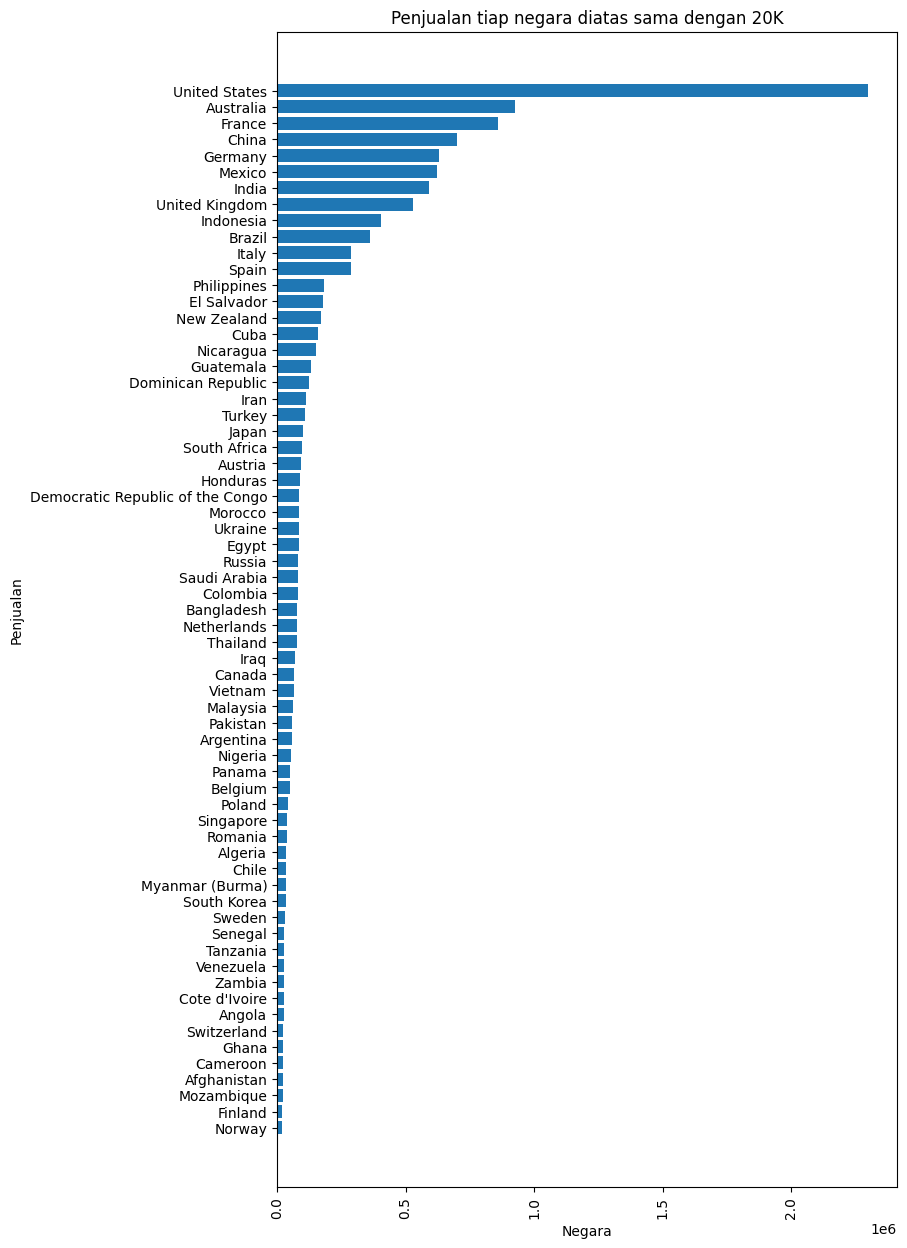

In [42]:
plt.figure(figsize=(8,15))
plt.xticks(rotation=90)
plt.title('Penjualan tiap negara diatas sama dengan 20K')
plt.xlabel('Negara')
plt.ylabel('Penjualan')
plt.barh(sales_up20k.index,sales_up20k.values)
plt.show()

In [55]:
sales_of_country=dataset.groupby('Country')['Sales'].sum().sort_values(ascending=False)

In [58]:
top5_of_sales=sales_of_country.head()
top5_of_sales

,Sales
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05


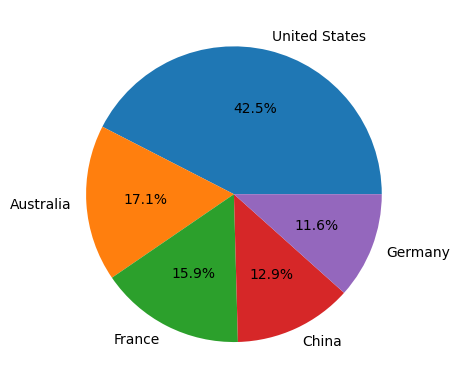

In [59]:
plt.pie(top5_of_sales.values, labels=top5_of_sales.index, autopct='%1.1f%%')
plt.show()